## BOARD & TOOLS

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Basic Libraries 📚
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Advanced Libraries 📚
import scipy.stats
from datetime import datetime

# Visualization Libraries 📚
import seaborn as sns

# Machine Learning ⚙️ 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## DATA READING

In [3]:
data = pd.read_csv("./data/king_ country_ houses_aa.csv")
df = data.copy()

## DATA INITIAL EXPLORATION /CARACTERIZATION

In [4]:
#Basic exploration

def df_caracterization():
    columns = df.columns.tolist()
    (dfrows,dfcolumns) = df.shape
    df.reset_index()
    print(f'Caracterization:\n')
    print(f'Number of Rows: {dfrows}\n')
    print(f'Number of Columns: {dfcolumns}\n')
    print(f'Columns Names/Variables/Features: {columns}\n')
    df.info()
    print(f'\n Head:\n')
    return df.head(5)

def explore_duplicates():
    duplicates = df.duplicated().sum()
    n_duplicates_percentage = round((duplicates / len(df)) * 100, 2)
    print(f"Percentage of duplicates: {n_duplicates_percentage}%")
    print(f"There are {duplicates} duplicate rows.;")
    
def explore_nan():
    nan_values = df.isna().sum()
    empty_spaces = df.eq(' ').sum()
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    return exploration

In [5]:
df_caracterization()

Caracterization:

Number of Rows: 21613

Number of Columns: 21

Columns Names/Variables/Features: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition    

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
explore_duplicates()

Percentage of duplicates: 0.0%
There are 0 duplicate rows.;


In [7]:
explore_nan()

,NaN,EmptySpaces
id,0,0
date,0,0
price,0,0
bedrooms,0,0
bathrooms,0,0
sqft_living,0,0
sqft_lot,0,0
floors,0,0
waterfront,0,0
view,0,0


# DATA CLEANING

STANDARIZATION & DATA SELECTION

    - Formatting to lower.case columns and clean empty spaces 
    - Remove empty columns and unname columns and others with non- relevant information. 
    - Remove all empty rows. #No necesary
    - unnamed columns #No necesary 

No necesary any of kind of standarization and in this case.
    
DATA CLEANING AND TRANSFORMATION

    - Data exploration for inconsistences. #No necesary 
    - Data cleaning: unintelligible and inconsistent data. #No necesary
    - Cleaning nulls and duplicates #No necesary
    - Transformation and reorder columns 
    - Moving the target to the right. 
    
 We need to follow only the two last points. 

## Transformation and reorder columns 

In [8]:
df.nunique().sort_values(ascending=False)

id               21436
sqft_lot          9782
sqft_lot15        8689
lat               5034
price             4028
sqft_living       1038
sqft_above         946
sqft_living15      777
long               752
date               372
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
bathrooms           30
bedrooms            13
grade               12
floors               6
view                 5
condition            5
waterfront           2
dtype: int64

In [9]:
df_caracterization()

Caracterization:

Number of Rows: 21613

Number of Columns: 21

Columns Names/Variables/Features: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition    

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
target = df.pop("price")
df.insert(len(df.columns), "price", target)

In [11]:
df = df.drop(columns = ["id", "date"])

# DATA EXPLORATION

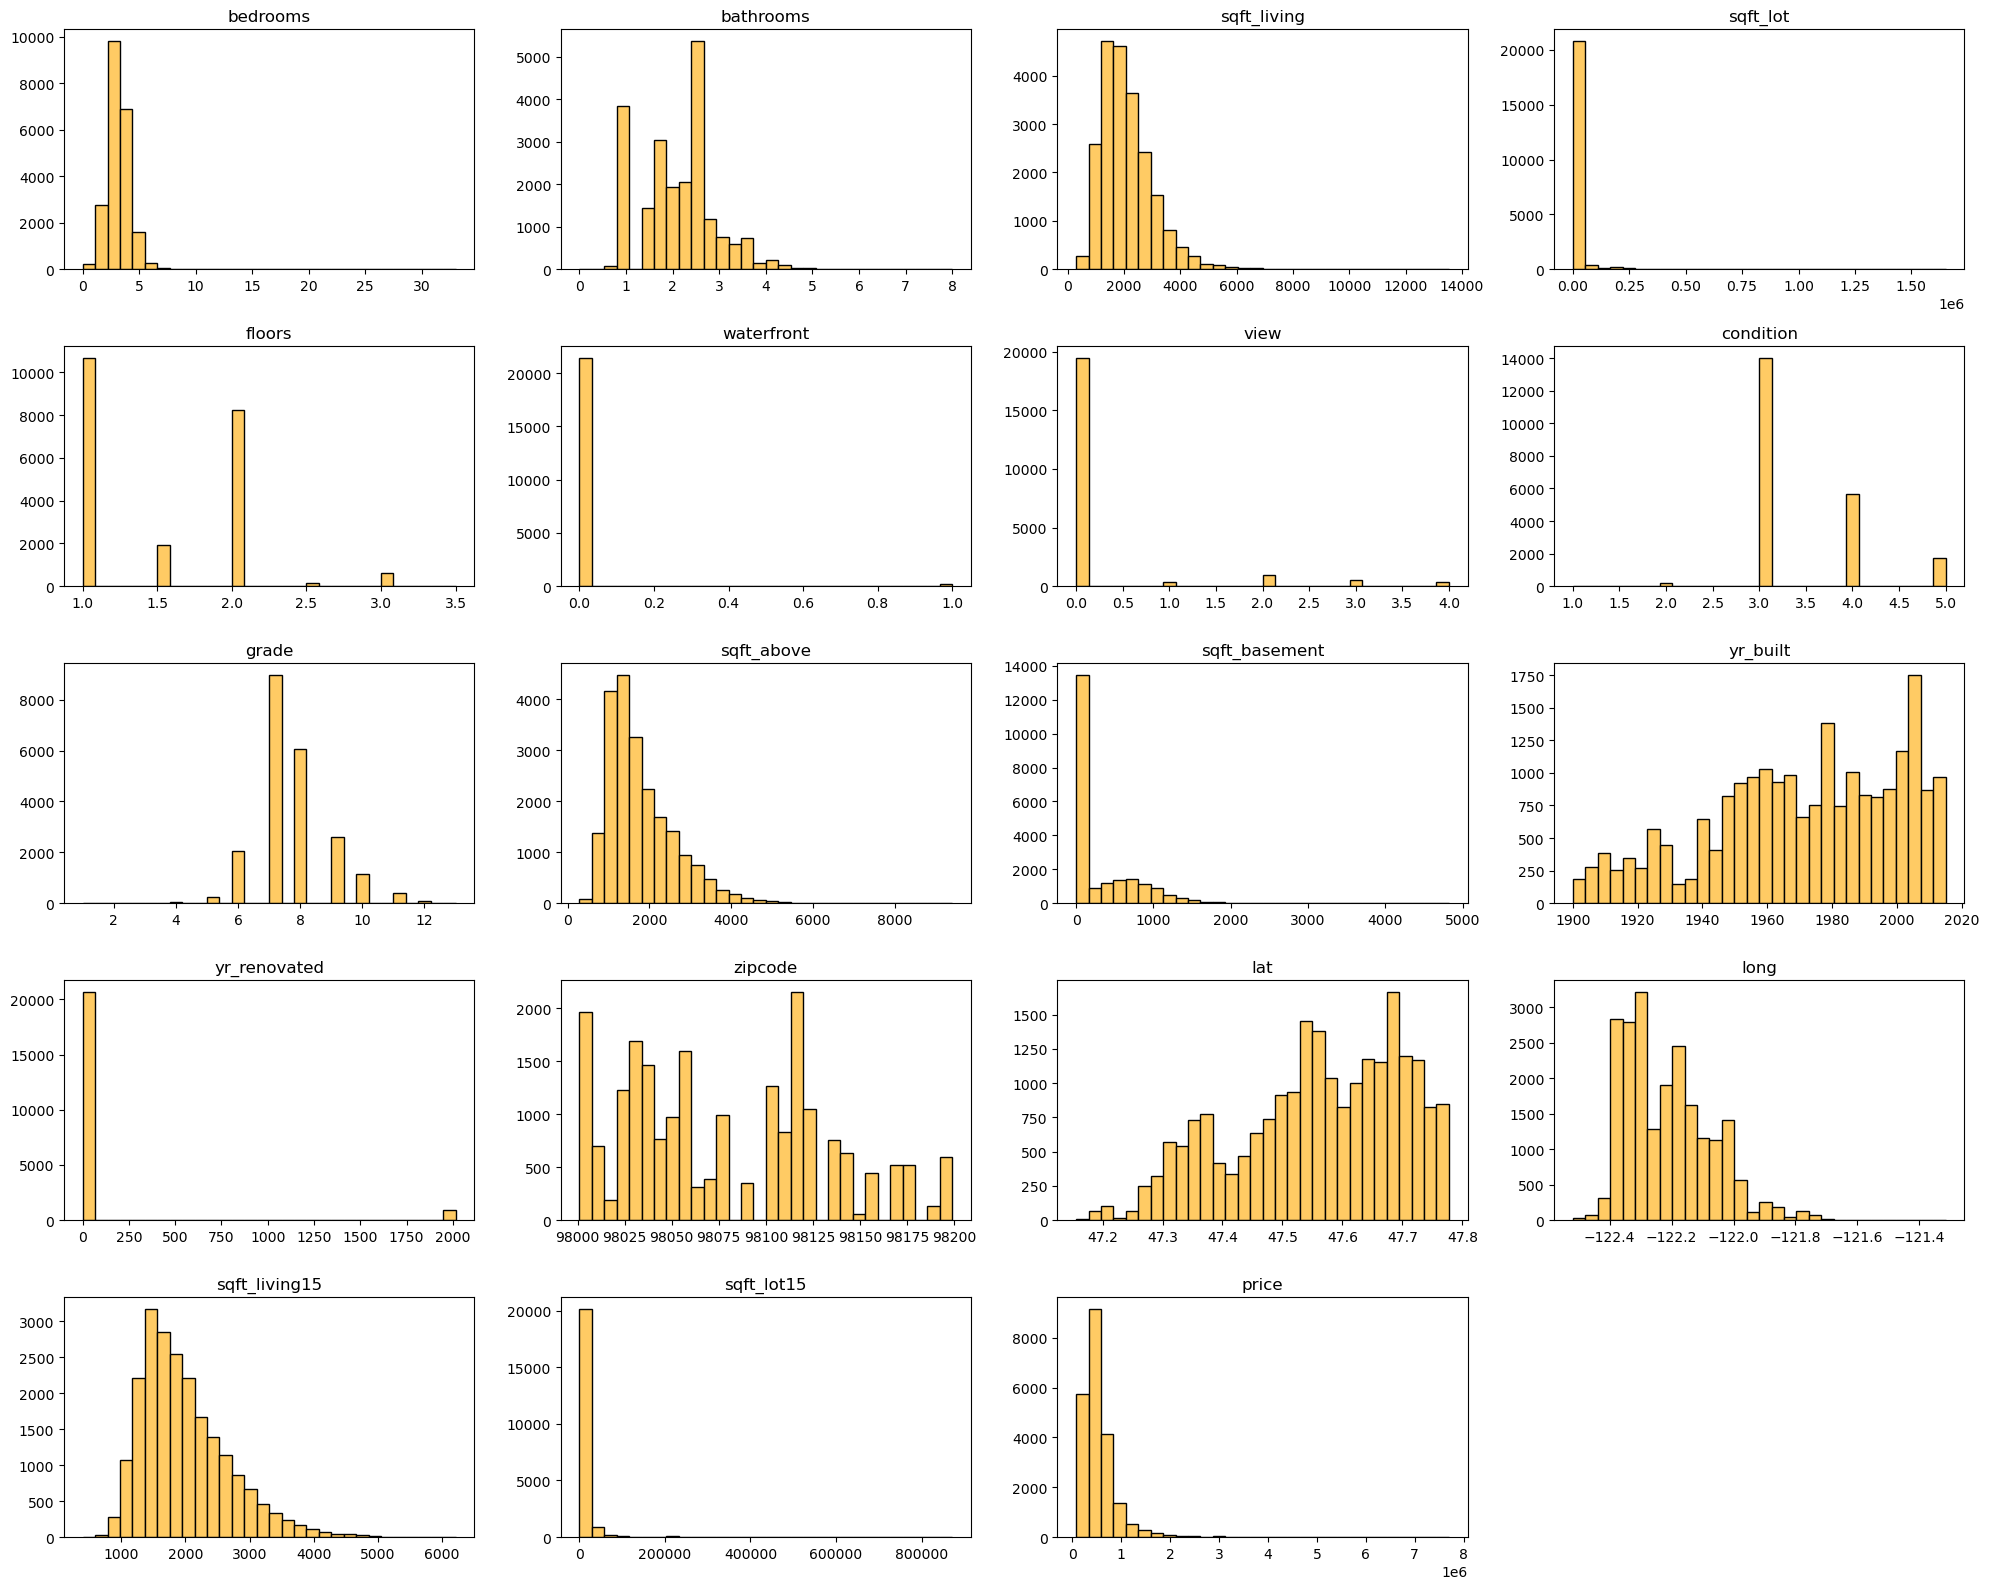

In [12]:
color = '#FFCb64'
edgecolor = "#434343"

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()

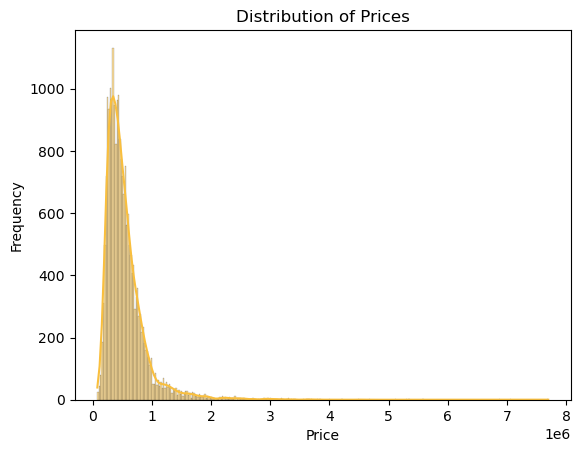

In [13]:
color = '#f9bf3e' 

sns.histplot(df["price"], color=color, kde=True)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')

plt.show()

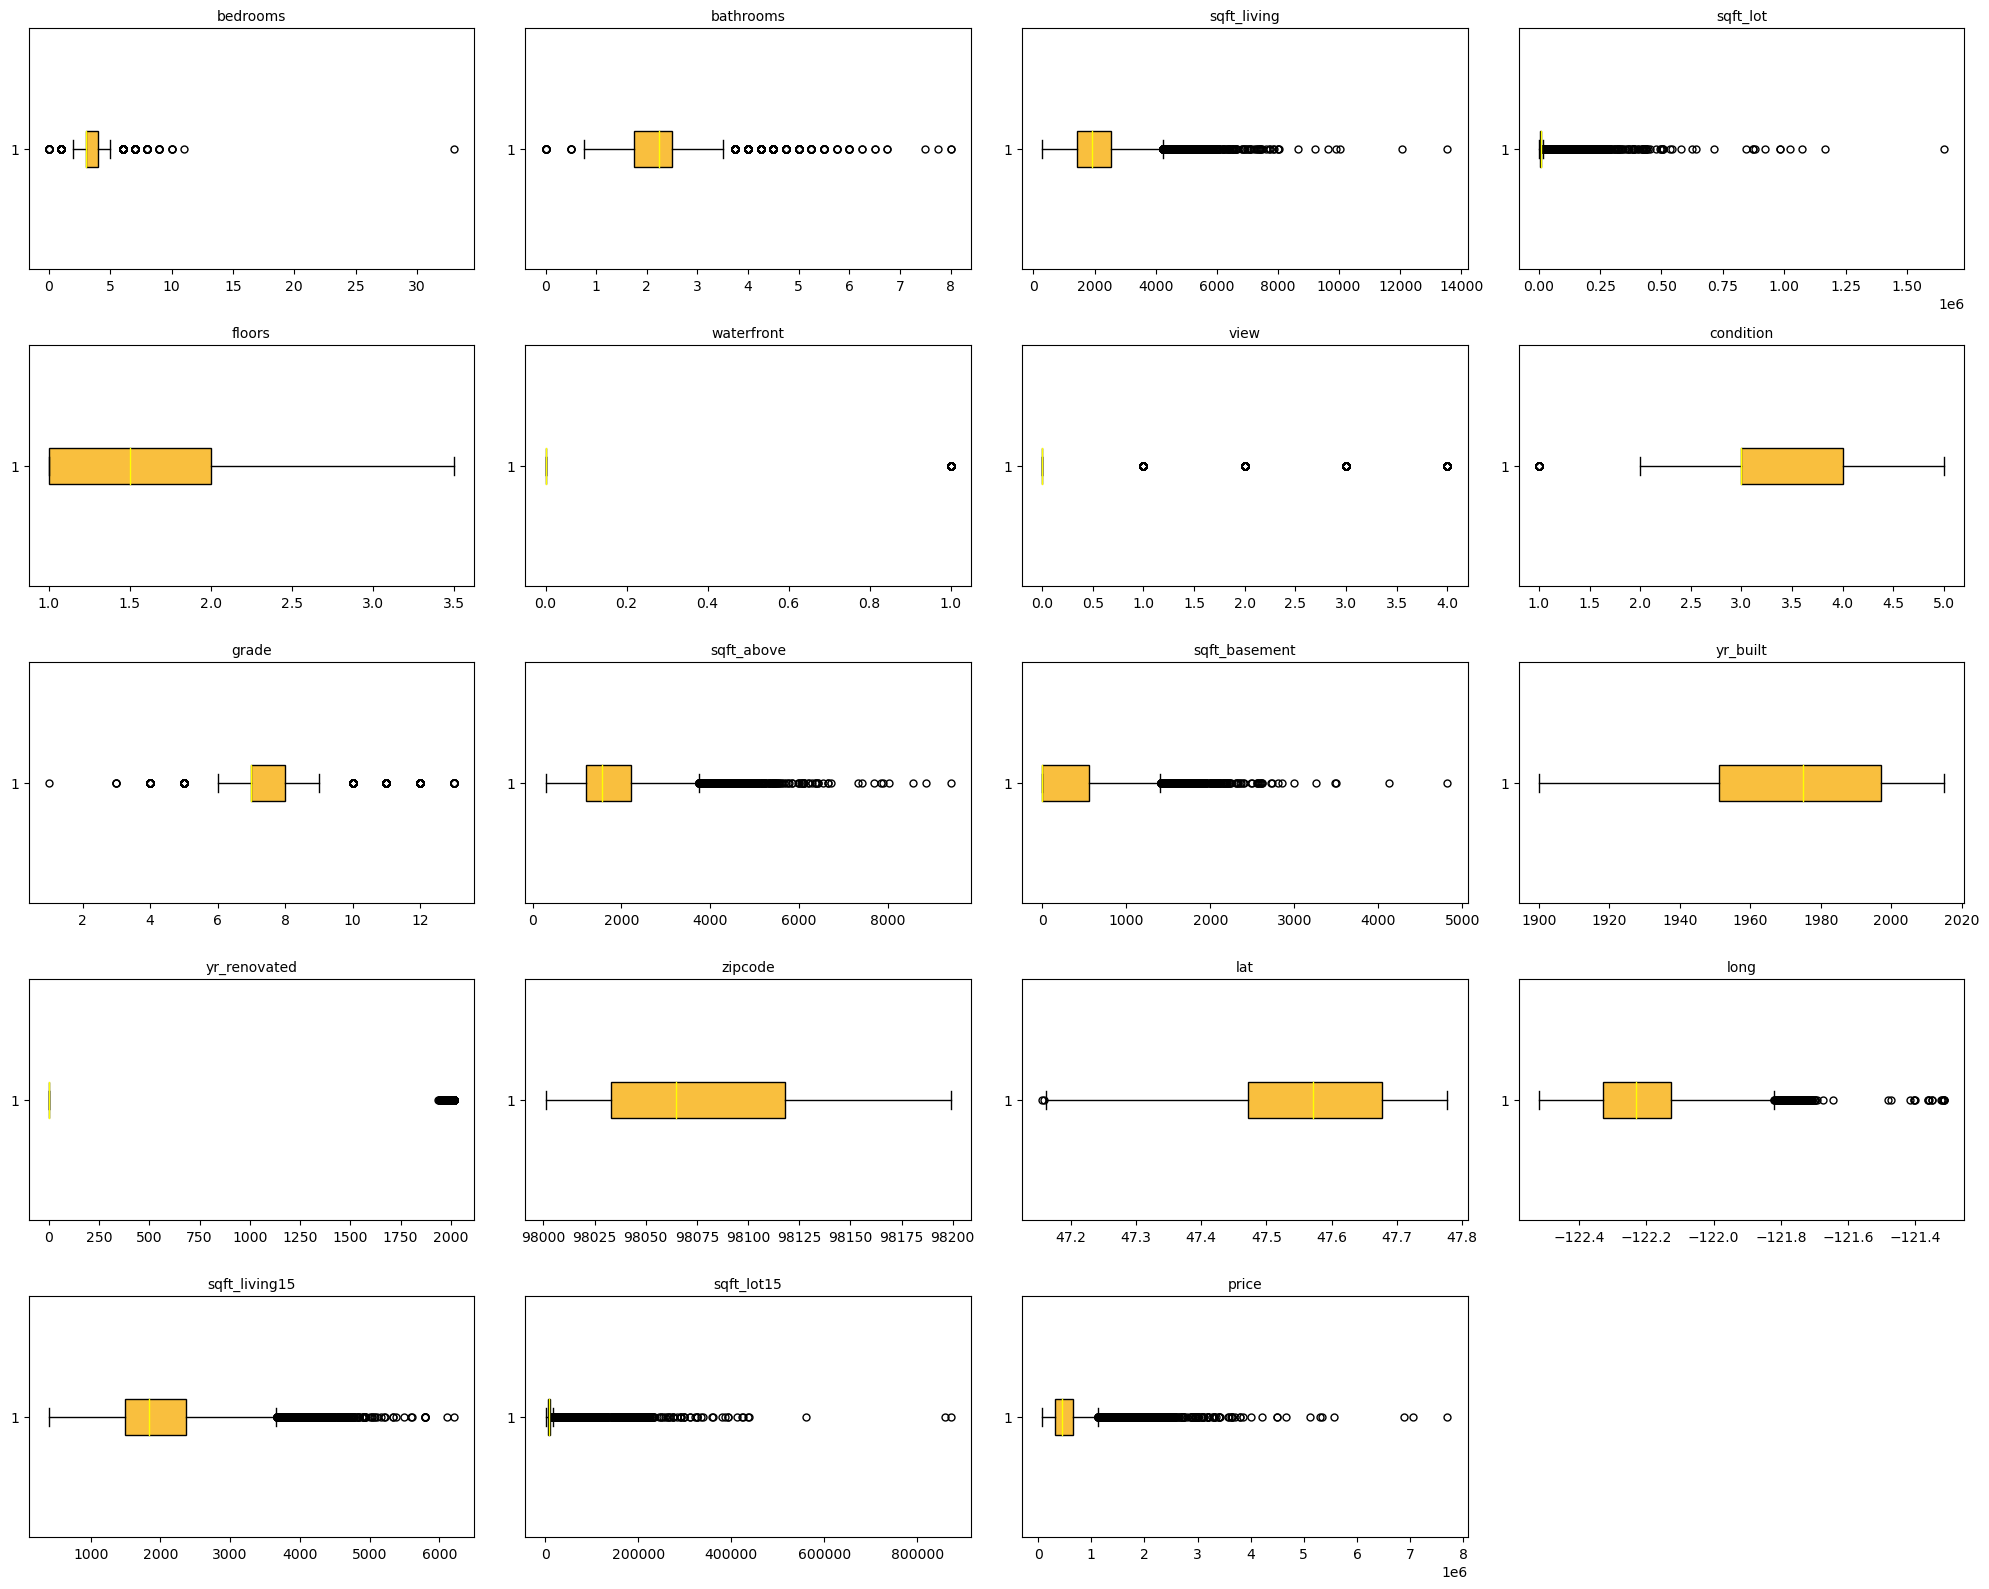

In [14]:

color = '#f9bf3e'

nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()


for i, ax in enumerate(axes):
    
    if i >= len(df.columns):
        ax.set_visible(False)  
        continue

    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)  

plt.tight_layout()  
plt.show()  # 


In [15]:
df2 = df.copy()

In [102]:
df2

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000.0


### DATAFRAME TRANSFORMATIONS

In [103]:
df2.corrwith(df2["price"]).sort_values(ascending=False)
num_corr = round(df2.corr(), 2)
num_corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
bedrooms,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03,0.31
bathrooms,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09,0.53
sqft_living,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18,0.70
sqft_lot,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72,0.09
floors,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01,0.26
waterfront,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03,0.27
view,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07,0.40
condition,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00,0.04
grade,0.36,0.66,0.76,0.11,0.46,0.08,0.25,-0.14,1.00,0.76,0.17,0.45,0.01,-0.18,0.11,0.20,0.71,0.12,0.67
sqft_above,0.48,0.69,0.88,0.18,0.52,0.07,0.17,-0.16,0.76,1.00,-0.05,0.42,0.02,-0.26,-0.00,0.34,0.73,0.19,0.61


In [3]:
num_corr

NameError: name 'num_corr' is not defined

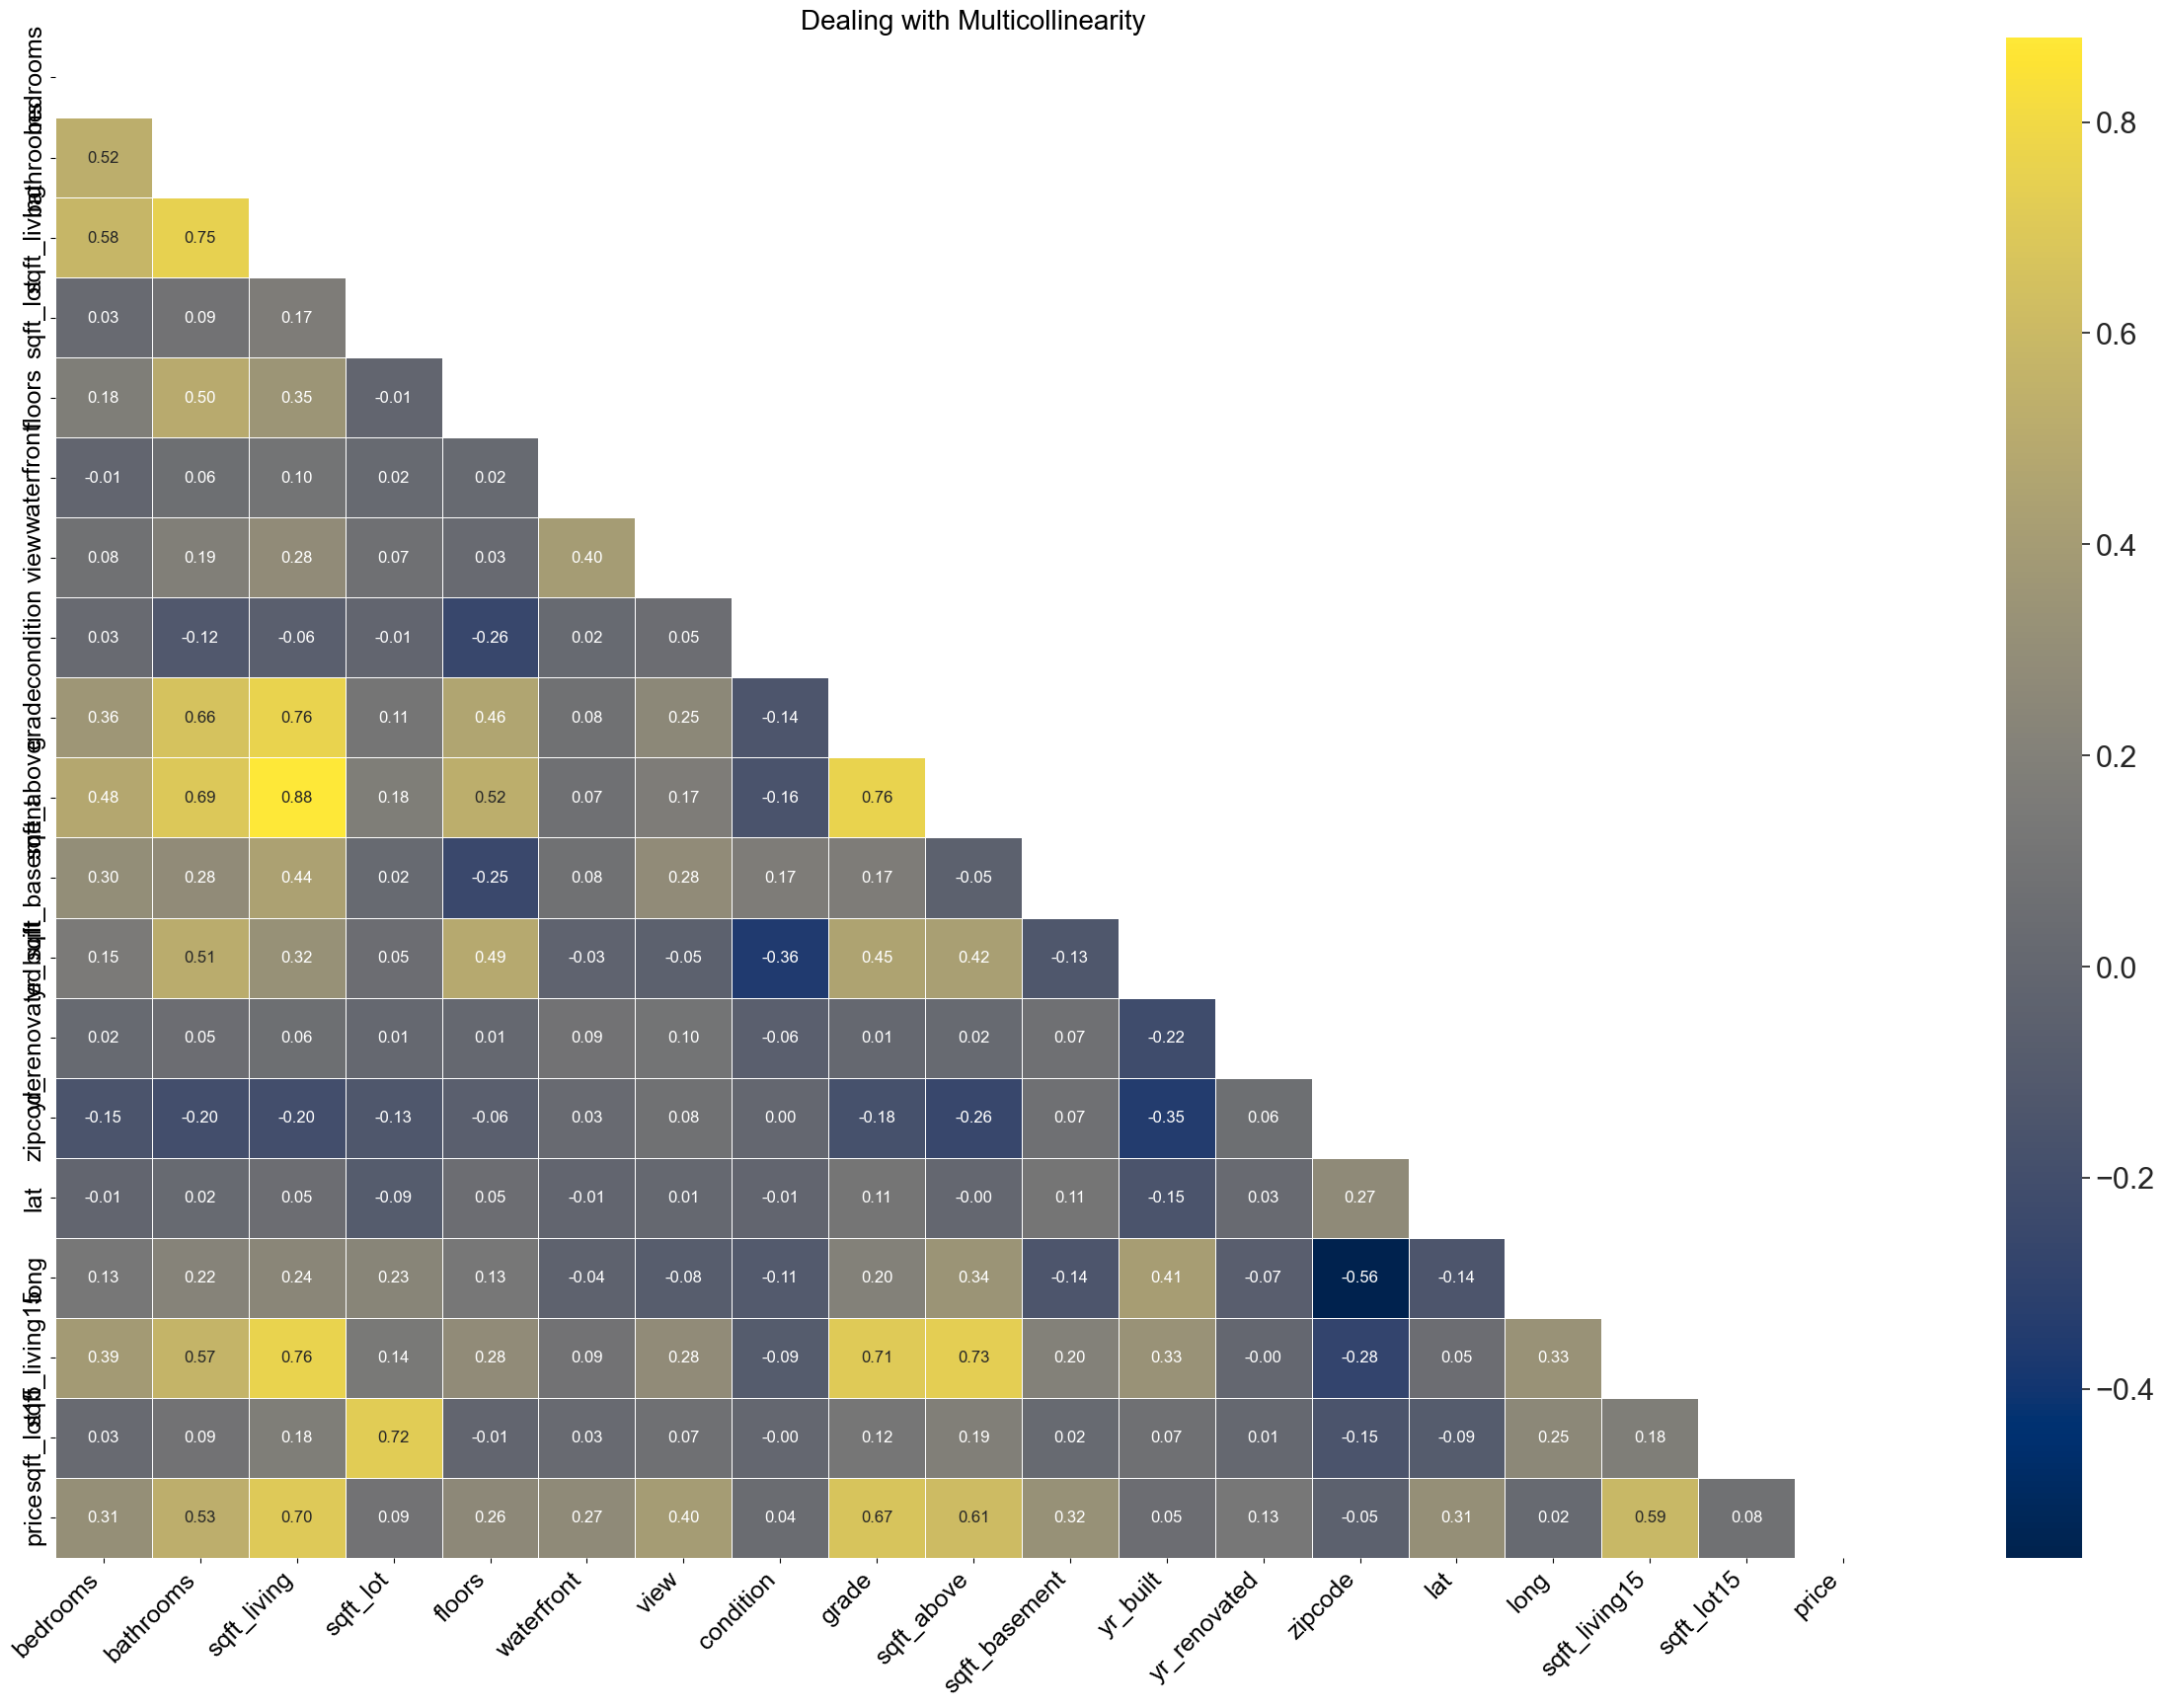

In [17]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(30, 20))
sns.set(font_scale=2) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="cividis", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_yticklabels(ax.get_yticklabels(), ha='right', fontsize=18) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=18) 
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

1. Option 1: 
    
        Multicolinearidad = sqt_above, grade, sqt_living
        Unnecesary = condition, yr_built, long
    
2. Option 2:

        Multicolinearidad = sqft_living15
        Unnecesary = yr_built
    
3. Option 3 (Change and add):

        Return sqt_above, pull out sqt_living and sqt_living15
        Unnecesary = zipcode
        
4. Option 4(Change and add):

        Return grade, pull out sqt_living and sqt_living15, sqt_above
        Unnecesary = zipcode and condition
        
5. Option 5:

        Add Bathroom 
        Unnecesary = yr_renovated.
        

In [18]:
df2.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [19]:
df_op1 = df2.drop(columns = ['sqft_above', 'sqft_living','grade','condition', 'yr_built','long'])

In [20]:
df_op2 = df2.drop(columns = ['sqft_living15','sqft_above','sqft_living','grade','condition','yr_built'])

In [21]:
df_op3 = df2.drop(columns = ['sqft_living15','sqft_living','grade','zipcode'])

In [22]:
df_op4 = df2.drop(columns = ['sqft_living15','sqft_above','sqft_living','condition','zipcode'])

⚙️ Next solution were developed later after normalization and retesting models:

In [23]:
# After Solution 1
df_op5 = df2.drop(columns = ['sqft_living15','sqft_above','sqft_living','condition','zipcode','yr_renovated','bathrooms'])

### PREDICTIVE MODEL TESTING

In [24]:
#Here you can test all the options. Default the best one


In [25]:
X = df_op4.drop("price", axis=1)
y = df_op4["price"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Lineal Regresion with outliers

In [27]:
print(f'100% of our data: {len(df2)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 21613.
70% for training data: 17290.
30% for test data: 4323.


In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
predictions = model.predict(X_test)

In [30]:
r2 = r2_score(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

In [31]:
#Printing the results

print("R2 = ", round(r2, 2))
print("The value of the metric MSE is ", round(MSE, 2))
print("MAE = ", round(MAE, 2))

R2 =  0.65
The value of the metric MSE is  53303047082.94
MAE =  136253.09


<table style="height: 317px;" width="463">
<tbody>
<tr>
<td style="width: 223.5px;">
<p>Option 1: Lineal Regresion</p>
<p>R2 = 0.57<br />The value of the metric MSE is 65181257232.68<br />MAE = 153787.77</p>
</td>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>Option 2: Lineal Regresion</p>
<p>R2 = 0.5<br />The value of the metric MSE is 75768246324.18<br />MAE = 168191.84</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>Option 3: Lineal Regresion</p>
<p>R2 = 0.66<br />The value of the metric MSE is 51503492400.91<br />MAE = 138623.69</p>
</td>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>Option 4: Lineal Regresion</p>
<p>R2 = 0.65<br />The value of the metric MSE is 53303047082.94<br />MAE = 136253.09</p>
<p>&nbsp;</p>
</td>
</tr>
</tbody>
</table>

#### Ridge Regresion

In [32]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions_ridge = ridge.predict(X_test)

In [33]:
r2_3_2 = r2_score(y_test, predictions_ridge)
RMSE_3_2 = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_3_2 = mean_squared_error(y_test, predictions_ridge)
MAE_3_2 = mean_absolute_error(y_test, predictions_ridge)

In [34]:
#Printing the results
print("R2 = ", round(r2_3_2, 4))
print("RMSE = ", round(RMSE_3_2, 4))
print("The value of the metric MSE is ", round(MSE_3_2, 4))
print("MAE = ", round(MAE_3_2, 4))

R2 =  0.6473
RMSE =  230895.9838
The value of the metric MSE is  53312955316.3787
MAE =  136255.0971


<table style="height: 317px;" width="463">
<tbody>
<tr>
<td style="width: 223.5px;">
<p>Option 1: Ridge</p>
<p>R2 = 0.6473<br />RMSE = 230895.9838<br />The value of the metric <br />MSE is 53312955316.3787<br />MAE = 136255.0971</p>
</td>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>Option 2: Ridge</p>
<p>R2 = 0.4987<br />RMSE = 275292.3264<br />The value of the metric MSE is 75785864968.2974<br />MAE = 168191.0677</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>Option 3: Ridge</p>
<div class="output_wrapper">
<div class="output">
<div class="output_area">
<div class="output_subarea output_text output_stream output_stdout" dir="auto">
<pre>R2 =  0.6592
RMSE =  226968.0771
The value of the metric </pre>
<pre>MSE is  51514508017.9797
MAE =  138616.5809</pre>
</div>
</div>
</div>
</div>
</td>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>Option 4: Ridge</p>
<p>R2 = 0.6473<br />RMSE = 230895.9838<br />The value of the metric MSE is 53312955316.3787<br />MAE = 136255.0971</p>
<p>&nbsp;</p>
</td>
</tr>
</tbody>
</table>

#### Lasso Regresion

In [35]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [36]:
predictions_lasso = lasso.predict(X_test)

In [37]:
r2_3_3 = r2_score(y_test, predictions_lasso)
RMSE_3_3 = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_3_3 = mean_squared_error(y_test, predictions_lasso)
MAE_3_3 = mean_absolute_error(y_test, predictions_lasso)

In [38]:
#Printing the results
print("R2 = ", round(r2_3_3, 4))
print("RMSE = ", round(RMSE_3_3, 4))
print("The value of the metric MSE is ", round(MSE_3_3, 4))
print("MAE = ", round(MAE_3_3, 4))

R2 =  0.6474
RMSE =  230874.7656
The value of the metric MSE is  53303157403.6083
MAE =  136252.7961


<table style="height: 317px;" width="463">
<tbody>
<tr>
<td style="width: 223.5px;">
<p>Option 1: Lasso</p>
<p>R2 = 0.5688<br />RMSE = 255306.7909<br />The value of the metric MSE is 65181557459.4669<br />MAE = 153787.5595</p>
</td>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>Option 2: Lasso</p>
<p>R2 = 0.4988<br />RMSE = 275261.6059<br />The value of the metric MSE is 75768951698.219<br />MAE = 168191.6557</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>Option 3: Lasso</p>
<div class="output_wrapper">
<div class="output">
<div class="output_area">
<div class="output_subarea output_text output_stream output_stdout" dir="auto">
<pre>R2 = 0.6593<br />RMSE = 226944.7763<br />The value of the metric </pre>
<pre>MSE is 51503931497.2689<br />MAE = 138623.4033</pre>
</div>
</div>
</div>
</div>
</td>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>Option 4: Lasso</p>
<p>R2 = 0.6474<br />RMSE = 230874.7656<br />The value of the metric MSE is 53303157403.6083<br />MAE = 136252.7961</p>
<p>&nbsp;</p>
</td>
</tr>
</tbody>
</table>

#### Decision Tree 

In [39]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [40]:
predictions_tree = tree.predict(X_test)

In [41]:
r2_3_4 = r2_score(y_test, predictions_tree)
RMSE_3_4 = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_3_4 = mean_squared_error(y_test, predictions_tree)
MAE_3_4 = mean_absolute_error(y_test, predictions_tree)

In [42]:
#Printing the results
print("R2 = ", round(r2_3_4, 4))
print("RMSE = ", round(RMSE_3_4, 4))
print("The value of the metric MSE is ", round(MSE_3_4, 4))
print("MAE = ", round(MAE_3_4, 4))

R2 =  0.7077
RMSE =  210223.6931
The value of the metric MSE is  44194001139.6739
MAE =  108039.7


<table style="height: 317px;" width="463">
<tbody>
<tr>
<td style="width: 223.5px;">
<p>Option 1: Decision Tree</p>
<p>R2 = 0.4985<br />RMSE = 275348.0102<br />The value of the metric MSE is 75816526711.5826<br />MAE = 127174.2466</p>
</td>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>Option 2: Decision Tree</p>
<p>R2 = 0.475<br />RMSE = 281736.1756<br />The value of the metric MSE is 79375272632.6888<br />MAE = 131190.5965</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>Option 3: Decision Tree</p>
<div class="output_wrapper">
<div class="output">
<div class="output_area">
<div class="output_subarea output_text output_stream output_stdout" dir="auto">
<pre>R2 = 0.685<br />RMSE = 218225.4361<br />The value of the metric <br />MSE is 47622340944.145<br />MAE = 112186.2443</pre>
</div>
</div>
</div>
</div>
</td>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>Option 4: Decision Tree</p>
<p>R2 = 0.7158<br />RMSE = 207267.406<br />The value of the metric MSE is 42959777602.9702<br />MAE = 108847.5882</p>
<p>&nbsp;</p>
</td>
</tr>
</tbody>
</table>

#### KNN Regression

In [43]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [44]:
predictions_knn = knn.predict(X_test)

In [45]:
r2_3_5 = r2_score(y_test, predictions_knn)
RMSE_3_5 = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_3_5 = mean_squared_error(y_test, predictions_knn)
MAE_3_5 = mean_absolute_error(y_test, predictions_knn)

In [46]:
#Printing the results
print("R2 = ", round(r2_3_5, 4))
print("RMSE = ", round(RMSE_3_5, 4))
print("The value of the metric MSE is ", round(MSE_3_5, 4))
print("MAE = ", round(MAE_3_5, 4))

R2 =  0.0987
RMSE =  369132.0406
The value of the metric MSE is  136258463372.4348
MAE =  228225.8518


<table style="height: 317px;" width="463">
<tbody>
<tr>
<td style="width: 223.5px;">
<p>Option 1: KNN&nbsp;</p>
<p>R2 = 0.3611<br />RMSE = 310794.5266<br />The value of the metric MSE is 96593237787.8263<br />MAE = 183825.4717</p>
</td>
</tr>
<tr>
<td style="width: 223.5px;">
<p>Option 3: KNN&nbsp;</p>
<div class="output_wrapper">
<div class="output">
<div class="output_area">
<div class="output_subarea output_text output_stream output_stdout" dir="auto">
<pre>R2 = 0.4143<br />RMSE = 297566.3387<br />The value of the metric <br />MSE is 88545725898.7465</pre>
<pre>MAE = 177217.057</pre>
</div>
</div>
</div>
</div>
</td>
</tr>
</tbody>
</table>

#### XGBoost Regression

In [47]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [48]:
predictions_xgb = xgbr.predict(X_test)

In [49]:
r2_3_6 = r2_score(y_test, predictions_xgb)
RMSE_3_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_3_6 = mean_squared_error(y_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

In [50]:
#Printing the results
print("R2 = ", round(r2_3_6, 4))
print("RMSE = ", round(RMSE_3_6, 4))
print("The value of the metric MSE is ", round(MSE_3_6, 4))
print("MAE = ", round(MAE_3_6, 4))

R2 =  0.7269
RMSE =  203179.7945
The value of the metric MSE is  41282028892.0845
MAE =  108474.3817


<table style="height: 317px;" width="463">
<tbody>
<tr>
<td style="width: 223.5px;">
<p>Option 1: XG Boost</p>
<p>R2 = 0.6569<br />RMSE = 227757.0849<br />The value of the metric MSE is 51873289731.1354<br />MAE = 118794.8963</p>
</td>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>Option 2:&nbsp;XG Boost</p>
<p>R2 = 0.5704<br />RMSE = 254853.1133<br />The value of the metric MSE is 64950109376.7364<br />MAE = 132732.2161</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>Option 3:&nbsp;XG Boost</p>
<div class="output_wrapper">
<div class="output">
<div class="output_area">
<div class="output_subarea output_text output_stream output_stdout" dir="auto">
<pre>R2 = 0.7155<br />RMSE = 207385.3015<br />The value of the metric <br />MSE is 43008663292.2126<br />MAE = 109675.9915</pre>
</div>
</div>
</div>
</div>
</td>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>Option 4:&nbsp;XG Boost</p>
<p>R2 = 0.7269<br />RMSE = 203179.7945<br />The value of the metric MSE is 41282028892.0845<br />MAE = 108474.3817</p>
<p>&nbsp;</p>
</td>
</tr>
</tbody>
</table>

- Valid options Option 3 and Option 4. 
- Valid Methods XGBoost, Decision Tree

### NORMALIZATION AND RETESTING

In [51]:
#Scalate to Robust Data:

scaler = preprocessing.RobustScaler()

robusted_data = scaler.fit_transform(df_op3)
robusted_data2 = scaler.fit_transform(df_op4)

robust_df3 = pd.DataFrame(robusted_data, columns=df_op3.columns)
robust_df4 = pd.DataFrame(robusted_data2, columns=df_op4.columns)


In [52]:
#Scalate to Standard Data:

scaler2 = preprocessing.StandardScaler()

standarized_data = scaler2.fit_transform(df_op3)
standarized_data2 = scaler2.fit_transform(df_op4)

standard_df3 = pd.DataFrame(standarized_data, columns=df_op3.columns)
standard_df4 = pd.DataFrame(standarized_data2, columns=df_op4.columns)

In [53]:
#Scalate to Min-Max

scaler3 = preprocessing.MinMaxScaler()

minmax_data = scaler3.fit_transform(df_op3)
minmax_data2 = scaler3.fit_transform(df_op4)

minmax_df3 = pd.DataFrame(minmax_data, columns=df_op3.columns)
minmax_df4 = pd.DataFrame(minmax_data2, columns=df_op4.columns)

⚙️ To scale after solution 1

In [54]:
#Option after Solution 1

minmax_data3 = scaler3.fit_transform(df_op5)
minmax_df5 = pd.DataFrame(minmax_data3, columns=df_op5.columns)

#### Split and Fit

In [55]:
X = minmax_df4.drop("price", axis=1)
y = minmax_df4["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Decision Tree 2

In [56]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [57]:
predictions_tree = tree.predict(X_test)

In [58]:
r2_3_4 = r2_score(y_test, predictions_tree)
RMSE_3_4 = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_3_4 = mean_squared_error(y_test, predictions_tree)
MAE_3_4 = mean_absolute_error(y_test, predictions_tree)

In [59]:
#Printing the results
print("R2 = ", round(r2_3_4, 4))
print("RMSE = ", round(RMSE_3_4, 4))
print("The value of the metric MSE is ", round(MSE_3_4, 4))
print("MAE = ", round(MAE_3_4, 4))

R2 =  0.6642
RMSE =  0.0295
The value of the metric MSE is  0.0009
MAE =  0.0144


<table style="height: 317px;" width="463">
<tbody>
<tr>
<td style="width: 223.5px;">
<p>Option 3 Robust:</p>
<p>R2 = 0.708<br />RMSE = 0.6503<br />The value of the metric MSE is 0.4229<br />MAE = 0.3407</p>
</td>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>Option 4 Robust:&nbsp;</p>
<p>R2 = 0.7216<br />RMSE = 0.635<br />The value of the metric MSE is 0.4033<br />MAE = 0.3355</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td style="width: 223.5px;">
<p>Option 3 Standard:</p>
<p>R2 = 0.6795<br />RMSE = 0.5996<br />The value of the metric MSE is 0.3595<br />MAE = 0.3051</p>
</td>
<td style="width: 223.5px;">
<p>Option 4 Standard:</p>
<p>R2 = 0.6476<br />RMSE = 0.6287<br />The value of the metric MSE is 0.3952<br />MAE = 0.2962</p>
</td>
</tr>
<tr>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>Option 3 MinMax:</p>
<div class="output_wrapper">
<div class="output">
<div class="output_area">
<div class="output_subarea output_text output_stream output_stdout" dir="auto">
<pre>R2 = 0.6922<br />RMSE = 0.0283<br />The value of the metric MSE is 0.0008<br />MAE = 0.0144</pre>
</div>
</div>
</div>
</div>
</td>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>Option 4 Min Max:</p>
<div class="cell code_cell rendered selected" tabindex="2">
<div class="output_wrapper">
<div class="output">
<div class="output_area">
<div class="output_subarea output_text output_stream output_stdout" dir="auto">
<pre>R2 =  0.7242
RMSE =  0.0268
The value of the metric MSE is  0.0007
MAE =  0.0142
</pre>
</div>
</div>
</div>
</div>
</div>
<div class="cell text_cell rendered unselected" tabindex="2">
<div class="prompt input_prompt">&nbsp;</div>
<div class="inner_cell">&nbsp;</div>
</div>
<p>&nbsp;</p>
</td>
</tr>
</tbody>
</table>
<p>&nbsp;</p>

#### XGBoost Regression 2

In [60]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [61]:
predictions_xgb = xgbr.predict(X_test)

In [62]:
r2_3_6 = r2_score(y_test, predictions_xgb)
RMSE_3_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_3_6 = mean_squared_error(y_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

In [63]:
#Printing the results
print("R2 = ", round(r2_3_6, 4))
print("RMSE = ", round(RMSE_3_6, 4))
print("The value of the metric MSE is ", round(MSE_3_6, 4))
print("MAE = ", round(MAE_3_6, 4))

R2 =  0.7269
RMSE =  0.0266
The value of the metric MSE is  0.0007
MAE =  0.0142


<table style="height: 317px;" width="463">
<tbody>
<tr>
<td style="width: 223.5px;">
<p>Option 3 Robust:</p>
<p>R2 = 0.7155<br />RMSE = 0.642<br />The value of the metric MSE is 0.4121<br />MAE = 0.3395</p>
</td>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>Option 4 Robust:&nbsp;</p>
<p>R2 = 0.7269<br />RMSE = 0.6289<br />The value of the metric MSE is 0.3956<br />MAE = 0.3358</p>
<p>&nbsp;</p>
</td>
</tr>
<tr>
<td style="width: 223.5px;">
<p>Option 3 Standard:</p>
<p>R2 = 0.7155<br />RMSE = 0.5649<br />The value of the metric MSE is 0.3191<br />MAE = 0.2987</p>
</td>
<td style="width: 223.5px;">
<p>Option 4 Standard:</p>
<p>R2 = 0.7269<br />RMSE = 0.5534<br />The value of the metric MSE is 0.3063<br />MAE = 0.2955</p>
</td>
</tr>
<tr>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>Option 3 MinMax:</p>
<div class="output_wrapper">
<div class="output">
<div class="output_area">
<div class="output_subarea output_text output_stream output_stdout" dir="auto">
<pre>R2 = 0.7155<br />RMSE = 0.0272<br />The value of the <br />metric MSE is 0.0007</pre>
<pre>MAE = 0.0144</pre>
</div>
</div>
</div>
</div>
</td>
<td style="width: 223.5px;">
<p>&nbsp;</p>
<p>&nbsp;</p>
<p>Option 4 Min Max:</p>
<p>R2 = 0.7269<br />RMSE = 0.0266<br />The value of the metric MSE is 0.0007<br />MAE = 0.0142</p>
<p>&nbsp;</p>
</td>
</tr>
</tbody>
</table>

### MODEL VALIDATION

In [64]:
#Possible Solution 1

X = minmax_df4.drop("price", axis=1)
y = minmax_df4["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [66]:
predictions_xgb = xgbr.predict(X_test)

In [67]:
print(f'25% for test prediction data is {len(predictions)}.')

25% for test prediction data is 4323.


In [68]:
#predictions_xgb_reshaped = predictions_xgb.reshape(-1, 1)
#y_test_reshaped = y_test.values.reshape(-1, 1)
#predictions_xgb_reshaped
#y_test_reshaped

In [69]:
r2_3_6 = r2_score(y_test, predictions_xgb)
RMSE_3_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_3_6 = mean_squared_error(y_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

In [70]:
#Printing the results
print("R2 = ", round(r2_3_6, 4))
print("RMSE = ", round(RMSE_3_6, 4))
print("The value of the metric MSE is ", round(MSE_3_6, 4))
print("MAE = ", round(MAE_3_6, 4))

R2 =  0.7415
RMSE =  0.0258
The value of the metric MSE is  0.0007
MAE =  0.0142


### Comparison

In [71]:
X = minmax_df4.drop("price", axis=1)
y = minmax_df4["price"]

In [72]:
predictions_xgb = xgbr.predict(X_test)

In [73]:
predictions_xgb_pd = pd.DataFrame(predictions_xgb)

In [74]:
predictions_xgb_pd.rename(columns={0: "Predictions"}, inplace=True)

In [75]:
predictions_pd = pd.concat([X_test, predictions_xgb_pd], axis=1)

In [76]:
predictions_pd = predictions_pd.dropna()

In [77]:
predictions_pd

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_lot15,Predictions
735,0.121212,0.28125,0.005072,0.4,0.0,0.0,0.583333,0.000000,0.747826,0.0,0.455043,0.296512,0.008097,0.021328
2830,0.151515,0.37500,0.003762,0.0,0.0,0.0,0.583333,0.221992,0.669565,0.0,0.840438,0.194352,0.006469,0.020768
4106,0.121212,0.31250,0.006283,0.4,0.0,0.5,0.833333,0.000000,0.843478,0.0,0.657391,0.323920,0.010377,0.034771
1227,0.121212,0.25000,0.004705,0.2,0.0,0.0,0.500000,0.000000,0.608696,0.0,0.384108,0.286545,0.007523,0.046225
2174,0.090909,0.12500,0.002350,0.2,0.0,0.0,0.583333,0.022822,0.260870,0.0,0.722696,0.181894,0.004306,0.026848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.090909,0.28125,0.064860,0.4,0.0,0.0,0.583333,0.000000,0.721739,0.0,0.992762,0.364618,0.054134,0.088990
1661,0.121212,0.21875,0.008359,0.0,0.0,0.0,0.500000,0.000000,0.600000,0.0,0.514396,0.308140,0.010760,0.089301
1694,0.090909,0.31250,0.000640,0.8,0.0,0.0,0.500000,0.000000,0.869565,0.0,0.893518,0.181063,0.001256,0.049626
268,0.090909,0.31250,0.005682,0.0,0.0,0.0,0.583333,0.134855,0.686957,0.0,0.229854,0.122924,0.008729,0.051666


In [78]:
scalated_predictions = scaler.inverse_transform(predictions_pd)

In [79]:
Xy_pd = pd.concat([X_test, y_test], axis=1)

In [80]:
scalated_real = scaler.inverse_transform(Xy_pd)

In [81]:
predictionsdf = pd.DataFrame(scalated_predictions, columns = minmax_df4.columns, index = predictions_pd.index)

In [82]:
realdf = pd.DataFrame(scalated_real)

In [83]:
comparison_df = pd.concat([realdf[13], predictionsdf["price"]], axis=1)

In [84]:
comparison_df = comparison_df.dropna()
comparison_df = comparison_df.rename(columns={"price": "Real Price", 13: "Estimation"})
comparison_df.round(2)

,Estimation,Real Price
0,462286.49,464067.00
3,509949.61,533792.89
6,480292.56,478848.80
17,480509.77,489350.73
19,466904.52,470678.92
...,...,...
5377,459532.62,458002.53
5382,516198.77,545683.64
5388,460210.50,462318.70
5391,459638.54,460766.19


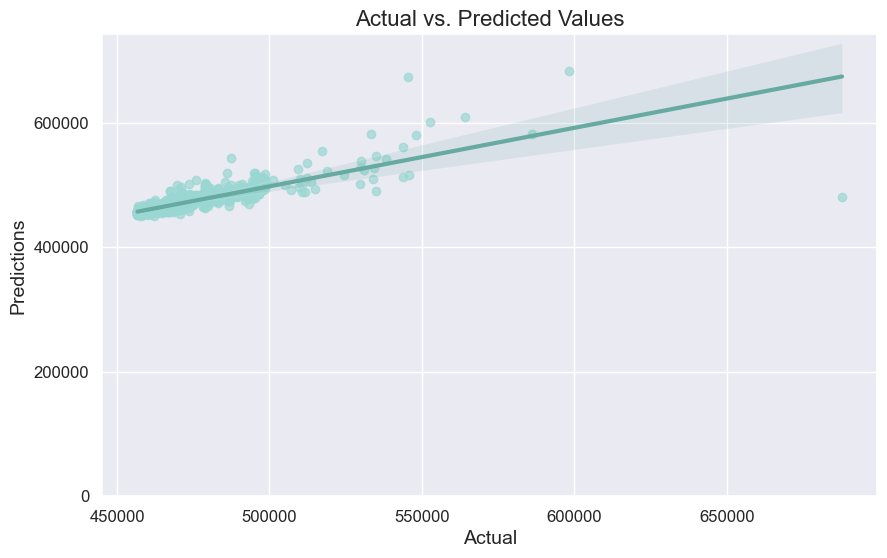

In [85]:
scatter_color = "#9ad7d2"
line_color = "#66aaa2"

plt.figure(figsize=(10, 6))

sns.regplot(x='Real Price', y='Estimation', data=comparison_df,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [86]:
#Possible Solution 2

X = minmax_df5.drop("price", axis=1)
y = minmax_df5["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [87]:
minmax_df5

,bedrooms,sqft_lot,floors,waterfront,view,grade,sqft_basement,yr_built,lat,long,sqft_lot15,price
0,0.090909,0.003108,0.0,0.0,0.0,0.500000,0.000000,0.478261,0.571498,0.217608,0.005742,0.019266
1,0.090909,0.004072,0.4,0.0,0.0,0.500000,0.082988,0.443478,0.908959,0.166113,0.008027,0.060721
2,0.060606,0.005743,0.0,0.0,0.0,0.416667,0.000000,0.286957,0.936143,0.237542,0.008513,0.013770
3,0.121212,0.002714,0.0,0.0,0.0,0.500000,0.188797,0.565217,0.586939,0.104651,0.004996,0.069377
4,0.090909,0.004579,0.0,0.0,0.0,0.583333,0.000000,0.756522,0.741354,0.393688,0.007871,0.057049
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.090909,0.000370,0.8,0.0,0.0,0.583333,0.000000,0.947826,0.874055,0.143688,0.000986,0.037377
21609,0.121212,0.003206,0.4,0.0,0.0,0.583333,0.000000,0.991304,0.570693,0.130399,0.007523,0.042623
21610,0.060606,0.000503,0.4,0.0,0.0,0.500000,0.000000,0.947826,0.705324,0.182724,0.001558,0.042898
21611,0.090909,0.001132,0.4,0.0,0.0,0.583333,0.000000,0.904348,0.608975,0.373754,0.000731,0.042623


In [88]:
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [89]:
predictions_xgb = xgbr.predict(X_test)

In [90]:
r2_3_6 = r2_score(y_test, predictions_xgb)
RMSE_3_6 = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_3_6 = mean_squared_error(y_test, predictions_xgb)
MAE_3_6 = mean_absolute_error(y_test, predictions_xgb)

In [91]:
#Printing the results
print("R2 = ", round(r2_3_6, 4))
print("RMSE = ", round(RMSE_3_6, 4))
print("The value of the metric MSE is ", round(MSE_3_6, 4))
print("MAE = ", round(MAE_3_6, 4))

R2 =  0.7718
RMSE =  0.0242
The value of the metric MSE is  0.0006
MAE =  0.0141


In [92]:
predictions_xgb2 = xgbr.predict(X_test)
predictions_xgb_pd2 = pd.DataFrame(predictions_xgb2)

In [93]:
predictions_xgb_pd2

,0
0,0.041864
1,0.072494
2,0.150294
3,0.268089
4,0.089604
...,...
5399,0.090203
5400,0.058360
5401,0.032583
5402,0.141815


In [94]:
predictions_xgb_pd2.rename(columns={0: "Predictions"}, inplace=True)
predictions_pd2 = pd.concat([X_test, predictions_xgb_pd2], axis=1)

In [95]:

scalated_predictions2 = scaler3.inverse_transform(predictions_pd2)

In [96]:
Xy_pd2 = pd.concat([X_test, y_test], axis=1)
scalated_real2 = scaler3.inverse_transform(Xy_pd2)

In [97]:
predictionsdf2 = pd.DataFrame(scalated_predictions2, columns = minmax_df5.columns, index = predictions_pd2.index)
realdf2 = pd.DataFrame(scalated_real2)

In [98]:
comparison_df2 = pd.concat([realdf2[11], predictionsdf2["price"]], axis=1)

In [99]:
comparison_df2 = comparison_df2.dropna()
comparison_df2 = comparison_df2.rename(columns={"price": "Real Price", 11: "Estimation 2"})
comparison_df2.round(2)

,Estimation 2,Real Price
0,365000.0,394210.90
1,865000.0,627764.88
2,1038000.0,1220991.23
3,1490000.0,2119177.23
4,711000.0,758234.23
...,...,...
5399,650000.0,762799.77
5400,705000.0,519993.55
5401,272500.0,323446.33
5402,2250000.0,1156335.79


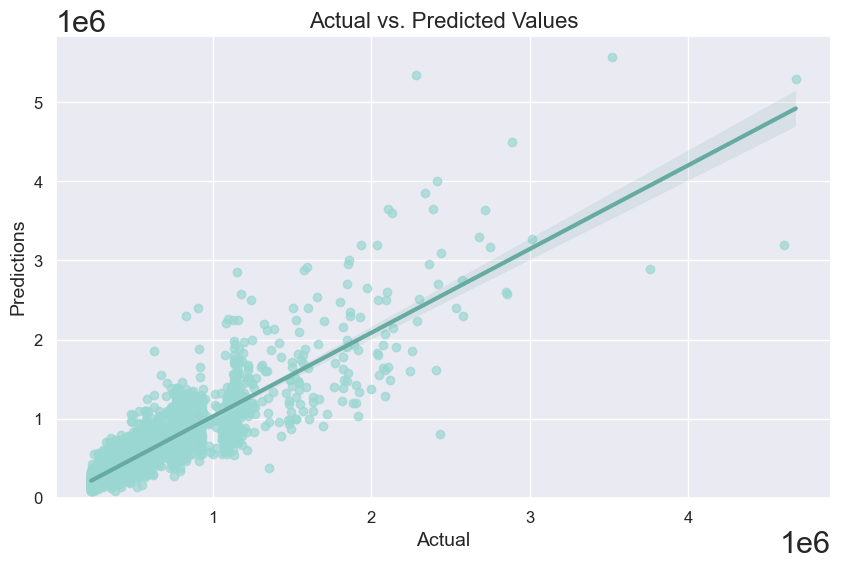

In [100]:
scatter_color = "#9ad7d2"
line_color = "#66aaa2"

plt.figure(figsize=(10, 6))

sns.regplot(x='Real Price', y='Estimation 2', data=comparison_df2,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

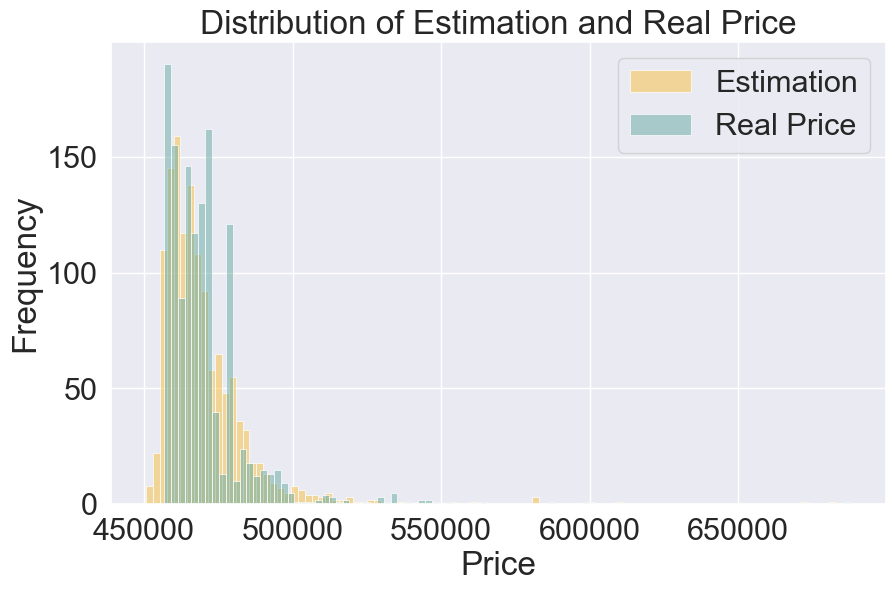

In [101]:
estimation_color = "#f9bf3e"
real_color = "#66aaa2"

plt.figure(figsize=(10, 6))
sns.histplot(data=comparison_df, x='Estimation', bins=100, color= estimation_color, alpha=0.5, label='Estimation')
sns.histplot(data=comparison_df, x='Real Price', bins=100, color= real_color, alpha=0.5, label='Real Price')


plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Estimation and Real Price')
plt.legend()

plt.show()